## 데크(deque) 자료형

https://ye5ni.tistory.com/107

큐가 양방향으로 작용하는 것을 데크라고 한다. <br>
즉, 앞뒤 양쪽 방향에서 엘리먼트를 추가하거나 제거할수 있다

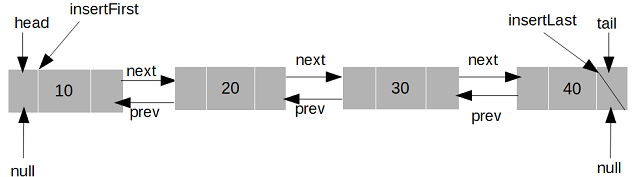

#### Design Circular Deque(원형데크)

Design your implementation of the circular double-ended queue (deque).

Implement the MyCircularDeque class:

- MyCircularDeque(int k) Initializes the deque with a maximum size of k.
- boolean insertFront() Adds an item at the front of Deque. Returns true if - the operation is successful, or false otherwise.
- boolean insertLast() Adds an item at the rear of Deque. Returns true if the operation is successful, or false otherwise.
- boolean deleteFront() Deletes an item from the front of Deque. Returns true if the operation is successful, or false otherwise.
- boolean deleteLast() Deletes an item from the rear of Deque. Returns true - if the operation is successful, or false otherwise.
- int getFront() Returns the front item from the Deque. Returns -1 if the deque is empty.
- int getRear() Returns the last item from Deque. Returns -1 if the deque is empty.
- boolean isEmpty() Returns true if the deque is empty, or false otherwise.
- boolean isFull() Returns true if the deque is full, or false otherwise.

Constraints:

- 1 <= k <= 1000
- 0 <= value <= 1000
- At most 2000 calls will be made to insertFront, insertLast, deleteFront, deleteLast, getFront, getRear, isEmpty, isFull.

In [ ]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.right = None
        self.left = None

class MyCircularDeque:

    def __init__(self, k: int):
        self.head = ListNode(None)
        self.tail = ListNode(None)
        self.k = k
        self.len = 0
        self.head.right = self.tail
        self.tail.left = self.head

    def _add(self, node:ListNode, new: ListNode):
        n = node.right
        node.right = new
        new.left = node
        new.right = n
        n.left = new

    def _del(self, node: ListNode):
        n = node.right.right
        node.right = n
        n.left = node

    # insertFront 와 insertLast 가 실행될때 head와 tail의 포인터를 먼저 이동
    def insertFront(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.head, ListNode(value))
        return True

    def insertLast(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.tail.left, ListNode(value))
        return True

    def deleteFront(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.head)
        return True

    def deleteLast(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.tail.left.left)
        return True

    def getFront(self) -> int:
        return self.head.right.val if self.len else -1

    def getRear(self) -> int:
        return self.tail.left.val if self.len else -1

    def isEmpty(self) -> bool:
        return self.len == 0 

    def isFull(self) -> bool:
        return self.len == self.k

## 힙(heap) 자료형

https://littlefoxdiary.tistory.com/3

힙은 특정한 규칙을 가지는 트리로 최댓값과 최솟값을 찾는 연산을 빠르게 하기 위해 고안된 완전이진트리를 기본으로한다.

힙 property : A 가 B 의 부모노드이면 A의 키값과 B의 키값 사이에는 대소 관계가 성립힌다.
- 최소 힙 : 부모 노드의 키값이 자식 노드의 키값보다 항상 작은 힙
- 최대 힙 : 부모 노드의 키값이 자식 노드의 키값보다 항상 큰 힙

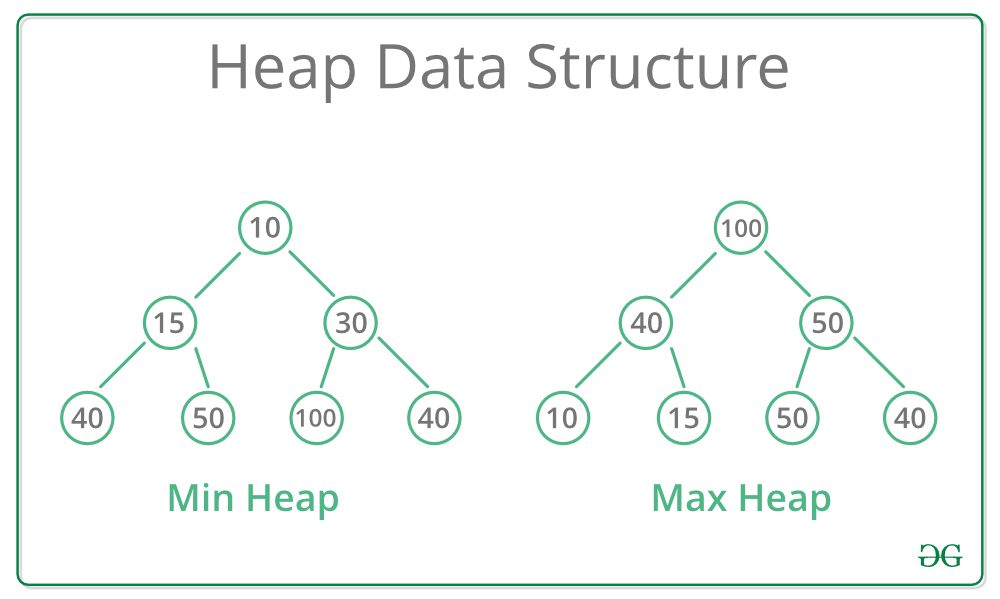

#### Merge k Sorted Lists


You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

Constraints:

- k == lists.length
- 0 <= k <= 104
- 0 <= lists[i].length <= 500
- -104 <= lists[i][j] <= 104
- lists[i] is sorted in ascending order.
- The sum of lists[i].length will not exceed 104.

Example 1:

Input: lists = [[1,4,5],[1,3,4],[2,6]] <br>
Output: [1,1,2,3,4,4,5,6] <br>
Explanation: The linked-lists are: <br>
[
  1->4->5,
  1->3->4,
  2->6
]<br>
merging them into one sorted list:<br>
1->1->2->3->4->4->5->6

In [ ]:
import heapq # heap 자료형을 사용하기 위한 모듈
from pyparsing import List, Optional


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        root = result = ListNode(None)
        heap = []
        for i in range(len(lists)):
            if lists[i]:
                heapq.heappush(heap, (lists[i]).val, i, lists[i])

        while heap:
            node = heapq.heapop(heap)
            idx = node[1]
            result.next = node[2]

            result = result.next
            if result.next:
                heapq.heappush(heap, (result.next.val, idx, result.next))
        
        return root.next

## 해시 테이블

https://mangkyu.tistory.com/102

해시 테이블 또는 해시 맵은 키를 값에 매핑할 수 있는 구조인, 연관 배열 추상 자료형을 구현하는 자료구조

해시 테이블은 (Key, Value)로 데이터를 저장하는 자료구조 중 하나로 빠르게 데이터를 검색할 수 있는 자료구조이다. 해시 테이블이 빠른 검색속도를 제공하는 이유는 내부적으로 배열(버킷)을 사용하여 데이터를 저장하기 때문이다. 해시 테이블은 각각의 Key값에 해시함수를 적용해 배열의 고유한 index를 생성하고, 이 index를 활용해 값을 저장하거나 검색하게 된다. 여기서 실제 값이 저장되는 장소를 버킷 또는 슬롯이라고 한다.

해시(Hash)함수
- 임의 크기 데이터를 고정 크기 값으로 매핑하는 데 사용 할 수 있는 함수

#### Design HashMap


Design a HashMap without using any built-in hash table libraries.

Implement the MyHashMap class:

- MyHashMap() initializes the object with an empty map.
- void put(int key, int value) inserts a (key, value) pair into the HashMap. If the key already exists in the map, update the corresponding value.
- int get(int key) returns the value to which the specified key is mapped, or -1 if this map contains no mapping for the key.
- void remove(key) removes the key and its corresponding value if the map contains the mapping for the key.

Constraints:

- 0 <= key, value <= 106
- At most 104 calls will be made to put, get, and remove.

Example 1:

Input
["MyHashMap", "put", "put", "get", "get", "put", "get", "remove", "get"]
[[], [1, 1], [2, 2], [1], [3], [2, 1], [2], [2], [2]] <br>
Output
[null, null, null, 1, -1, null, 1, null, -1]

Explanation <br>
MyHashMap myHashMap = new MyHashMap(); <br>
myHashMap.put(1, 1); // The map is now [[1,1]] <br>
myHashMap.put(2, 2); // The map is now [[1,1], [2,2]] <br>
myHashMap.get(1);    // return 1, The map is now [[1,1], [2,2]] <br>
myHashMap.get(3);    // return -1 (i.e., not found), The map is now [[1,1], [2,2]] <br>
myHashMap.put(2, 1); // The map is now [[1,1], [2,1]] (i.e., update the existing value) <br>
myHashMap.get(2);    // return 1, The map is now [[1,1], [2,1]] <br>
myHashMap.remove(2); // remove the mapping for 2, The map is now [[1,1]] <br>
myHashMap.get(2);    // return -1 (i.e., not found), The map is now [[1,1]]

In [ ]:
import collections

class ListNode:
    def __init__(self,key=None,value=None):
        self.key = key
        self.value = value
        self.next = None

class MyHashMap:

    def __init__(self):
        self.size = 1000
        self.table = collections.defaultdict(ListNode)

    def put(self, key: int, value: int) -> None:
        index = key % self.size
        if self.table[index].value is None:
            self.table[index] = ListNode(key, value)
            return
        p = self.table[index]
        while p:
            if p.key == key:
                p.value = value
                return
            if p.next is None:
                break
            p = p.next
        p.next = ListNode(key, value)

    def get(self, key: int) -> int:
        index = key % self.size
        if self.table[index] is None:
            return -1
        p = self.table[index]
        while p:
            if p.key == key:
                return p.value
            p = p.next
        return -1

    def remove(self, key: int) -> None:
        index = key % self.size
        if self.table[index].value is None:
            return
        p = self.table[index]
        if p.key == key:
            self.table[index] = ListNode() if p.next is None else p.next
            return
        
        prev = p
        while p:
            if p.key == key:
                prev.next = p.next
                return
            
            prev, p = p, p.next
        

## <hr>

#### Jewels and Stones

You're given strings jewels representing the types of stones that are jewels, and stones representing the stones you have. Each character in stones is a type of stone you have. You want to know how many of the stones you have are also jewels.

Letters are case sensitive, so "a" is considered a different type of stone from "A".

Constraints:

- 1 <= jewels.length, stones.length <= 50
- jewels and stones consist of only English letters.
- All the characters of jewels are unique.

Example 1:

Input: jewels = "aA", stones = "aAAbbbb" <br>
Output: 3<br>

Example 2:

Input: jewels = "z", stones = "ZZ"<br>
Output: 0

In [ ]:
def numJewelsInStones(self, jewels: str, stones: str) -> int:
    freqs = {}
    count = 0

    for ch in stones:
        if ch not in freqs:
            freqs[ch] = 1
        else:
            freqs[ch] += 1

    for ch in jewels:
        if ch in freqs:
            count += freqs[ch]

    return count